In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [33]:
params = pd.read_csv("parametros.csv")
display(params)

,L,k,x0,b,Data
0,22.473252,0.019270,52.985626,0.862323,09-06-2024
1,22.599498,0.019126,77.080476,0.551366,22-06-2024


In [34]:
data = pd.read_csv("pesos.csv")
display(data)

,data,peso
0,2024-02-07,6.50
1,2024-02-28,8.50
2,2024-03-08,9.70
3,2024-03-13,10.50
4,2024-04-13,13.15
5,2024-05-04,15.55
6,2024-05-31,17.80
7,2024-06-08,18.30
8,2024-06-22,19.20


In [39]:
# Certificar-se de que a coluna 'data' é do tipo datetime
data['data'] = pd.to_datetime(data['data'])

# Converter a coluna de data para dias desde a primeira data
data['dias'] = (data['data'] - data['data'].min()).dt.days

# Dados de entrada para o ajuste
x_data = data['dias']
y_data = data['peso']

In [67]:
#Escolher modelo
data_desejada = '09-06-2024'
params_desejados = params.loc[params['Data'] == data_desejada]
print(params_desejados)
L = params_desejados['L'].values[0]
k = params_desejados['k'].values[0]
x0 = params_desejados['x0'].values[0]
b = params_desejados['b'].values[0]

           L        k         x0         b        Data
0  22.473252  0.01927  52.985626  0.862323  09-06-2024


In [68]:
def logistic_function(x, L, k, x0, b):
    return L / (1 + b * np.exp(-k * (x - x0)))

In [69]:
x = np.linspace(0, 400, 1000)
y_model = logistic_function(x, L, k, x0, b)

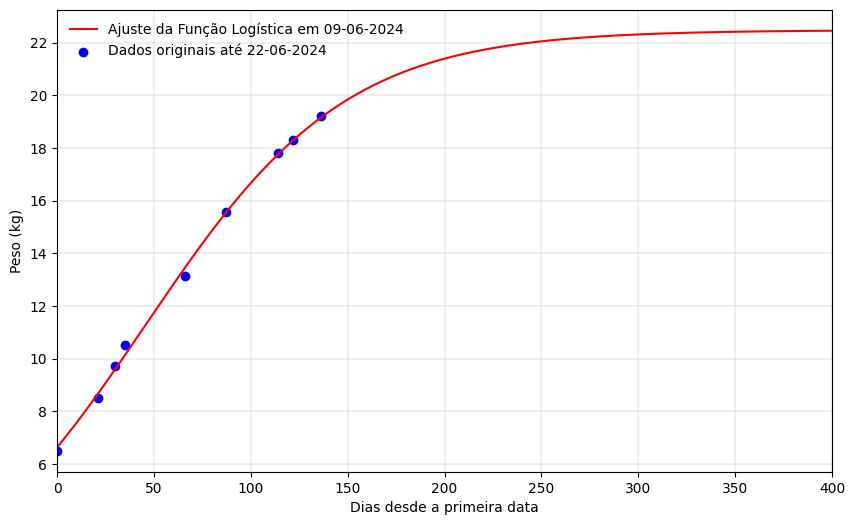

In [70]:
plt.figure(figsize=(10, 6))

#modelo antigo
plt.plot(x, y_model, label='Ajuste da Função Logística em ' + data_desejada, color='red')
plt.scatter(data['dias'], data['peso'], label='Dados originais até ' + data['data'].max().strftime('%d-%m-%Y'), color='blue')
plt.xlim([0,x[-1]])
plt.xlabel('Dias desde a primeira data')
plt.ylabel('Peso (kg)')
plt.legend(frameon = False)
plt.grid(True,which='both', axis='both', linestyle='-', linewidth=0.3)